In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

from keras.datasets import mnist

from matplotlib import pyplot as plt

import mnist_loader
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

In [11]:
class MLP(nn.Module):
    def __init__(self, input_size:int, hidden_size:list, output_size:int) -> None:
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size[0])
        self.hidden_layers = []
        for i in range(1, len(hidden_size), 1):
            self.hidden_layers.append(nn.Linear(hidden_size[i-1], hidden_size[i]))
        self.relu = nn.LeakyReLU()
        self.output_layer = nn.Linear(hidden_size[len(hidden_size) - 1], output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.input_layer(x)
        for layer in self.hidden_layers:
            x = self.relu(x)
            x = layer(x)
        x = self.output_layer(x)
        return x

In [12]:
model = MLP(input_size=784, hidden_size=[200, 50], output_size=10)

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
val_size = 10000

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.int64)

val_data = train_data[train_data.shape[0] - val_size : train_data.shape[0]]
val_labels = train_labels[train_labels.shape[0] - val_size: train_labels.shape[0]]

train_data = train_data[0 : train_data.shape[0] - val_size]
train_labels = train_labels[0 : train_labels.shape[0] - val_size]

test_data = torch.tensor(test_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.int64)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
epochs = 15

In [13]:
val_labels.shape

torch.Size([10000])

In [14]:
def calculate_accuracy(model, data, labels):
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / labels.size(0)
    return accuracy

In [15]:
batch_size = 10
for epoch in range(epochs):
    for i in range(int(train_data.shape[0]/batch_size)):
        data = train_data[i*batch_size:(i+1)*batch_size]
        labels = train_labels[i*batch_size:(i+1)*batch_size]
        out = model(data)
        loss = criterion(out, labels)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    print(f"Acuracia: {calculate_accuracy(model, val_data, val_labels)}")

Epoch [1/15], Loss: 0.0134
Acuracia: 0.9531
Epoch [2/15], Loss: 0.0089
Acuracia: 0.9602
Epoch [3/15], Loss: 0.0159
Acuracia: 0.9637
Epoch [4/15], Loss: 0.0221
Acuracia: 0.9659
Epoch [5/15], Loss: 0.1187
Acuracia: 0.9688
Epoch [6/15], Loss: 0.0694
Acuracia: 0.9702
Epoch [7/15], Loss: 0.0065
Acuracia: 0.9707
Epoch [8/15], Loss: 0.0019
Acuracia: 0.9696
Epoch [9/15], Loss: 0.0010
Acuracia: 0.9711
Epoch [10/15], Loss: 0.0006
Acuracia: 0.9714
Epoch [11/15], Loss: 0.0004
Acuracia: 0.9721
Epoch [12/15], Loss: 0.0005
Acuracia: 0.9729
Epoch [13/15], Loss: 0.0006
Acuracia: 0.9731
Epoch [14/15], Loss: 0.0004
Acuracia: 0.9738
Epoch [15/15], Loss: 0.0004
Acuracia: 0.9743


In [16]:
out = model(test_data)
calculate_accuracy(model, test_data, test_labels)

0.9756

In [17]:
y_true = test_labels.detach().numpy()
y_pred = out.argmax(axis=1).detach().numpy()

print(f"Acuracia: {accuracy_score(y_true, y_pred)}")
print(f"Precisao: {precision_score(y_true, y_pred, average='micro')}")
print(f"Recall: {recall_score(y_true, y_pred, average='micro')}")


Acuracia: 0.9756
Precisao: 0.9756
Recall: 0.9756


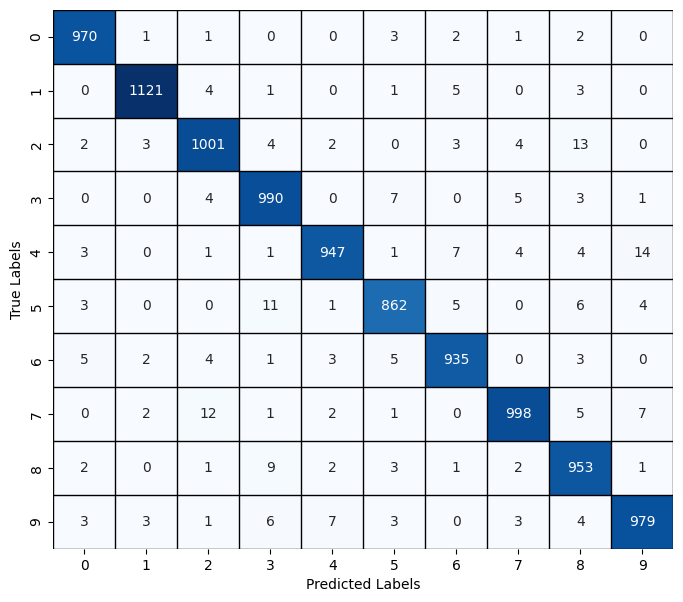

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 7))

# Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))

# Labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

for i in range(11):
    plt.hlines(i, xmin=0, xmax=10, colors='black', linestyles='solid', linewidth=1)
    plt.vlines(i, ymin=0, ymax=10, colors='black', linestyles='solid', linewidth=1)

plt.show()